<center>

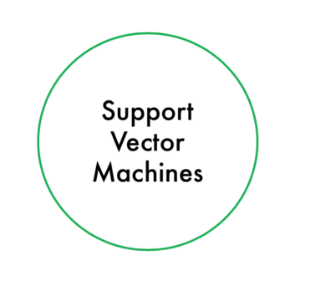

**<h1>... SVM! easy and simple for newbies ...</h1> by Nader M. Elhadedy**
</center>

---

**<h2>In this tutorial I'm planning to explain and simplify the support vector machines algorithm and implement it step by step in Python.</h2>**


**SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems.**

In [1]:
# helping libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold

> # We will start by creating a simple dataset to work on.

In [2]:
# creating dataset
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=2, random_state=40)

# encode classes into +1 | -1
y = np.where(y == 0, -1, 1)

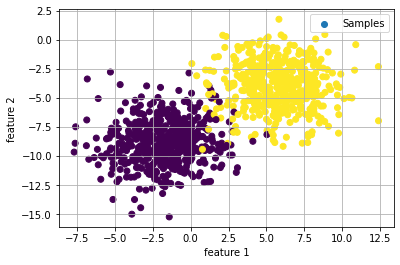

In [3]:
_ = plt.scatter(X[:,0], X[:,1], c=y, label='Samples')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid()

> # The data is very simple but we will use some methods to perform our EDA

In [4]:
# create a dataframe containing data
df = pd.DataFrame(np.c_[X, y], columns=['feature1', 'feature2', 'label'])

In [5]:
# printing the head rows of data
df.head()

,feature1,feature2,label
0,4.805989,-1.390050,1.0
1,-1.023414,-10.536359,-1.0
2,9.228997,-4.305517,1.0
3,5.783525,-3.410530,1.0
4,6.498533,-2.079397,1.0


In [6]:
# get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  1000 non-null   float64
 1   feature2  1000 non-null   float64
 2   label     1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [7]:
# generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
feature1,1000.0,2.010019,4.245716,-7.670733,-1.635702,1.917856,5.780196,12.381745
feature2,1000.0,-6.429809,3.092060,-15.262247,-8.930408,-6.427358,-3.920147,1.748616
label,1000.0,0.000000,1.000500,-1.000000,-1.000000,0.000000,1.000000,1.000000


In [8]:
# checking null values in each column
df.isna().sum()

feature1    0
feature2    0
label       0
dtype: int64

In [9]:
# checking duplicated values in each row
df.duplicated().sum()

0

In [10]:
# checking balance of the label
df.label.value_counts()

-1.0    500
 1.0    500
Name: label, dtype: int64

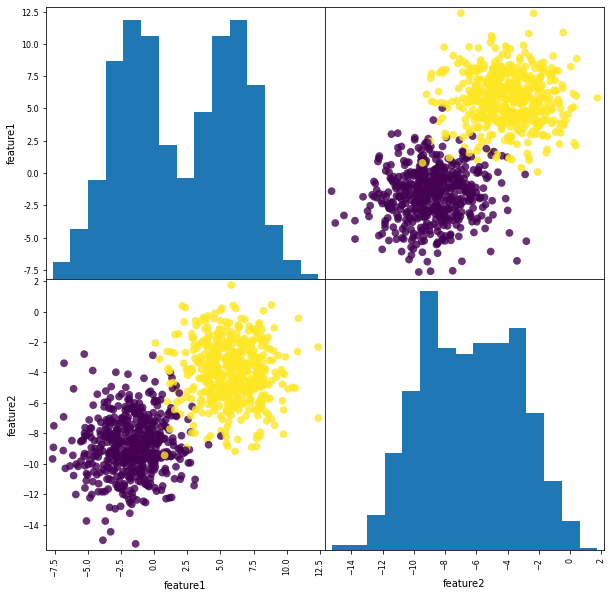

In [11]:
# visualize the features and their relations
_ = pd.plotting.scatter_matrix(df[['feature1','feature2']], figsize=(10,10),marker='o',hist_kwds={'bins':15},s=60,alpha=.8, c=df["label"])

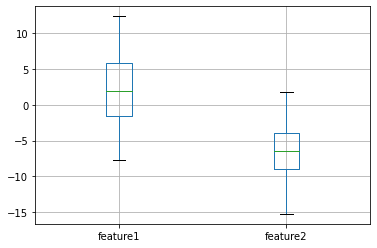

In [12]:
# plotting boxplot to check for outliers
_ = df.iloc[:,:2].boxplot()

In [13]:
# checking the correlation between features
df.corr()

,feature1,feature2,label
feature1,1.000000,0.689806,0.877584
feature2,0.689806,1.000000,0.780272
label,0.877584,0.780272,1.000000


In [14]:
# removing outliers if found
for col in df[df.columns.difference(['label'])]:
    Q1 = np.percentile(df[col], 25,interpolation = 'midpoint') 
    Q3 = np.percentile(df[col], 75,interpolation = 'midpoint') 
    IQR = Q3 - Q1
    print(f"For: {str(col)}")
    print('IQR =', IQR)
    print("Old Shape: ", df.shape) 
    # Upper bound
    upper = np.where(df[col] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df[col] <= (Q1-1.5*IQR))
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)
    print("New Shape: ", df.shape)
    print()

For: feature1
IQR = 7.420060446471097
Old Shape:  (1000, 3)
New Shape:  (1000, 3)

For: feature2
IQR = 5.0125023175172725
Old Shape:  (1000, 3)
New Shape:  (1000, 3)



> # **Implementing SVM algorithm**

> #### Big thanks in advance to this repository which I followed. [Code](https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/support_vector_machine.py)

In [15]:
# split data into train and test set and store actual data
X_total, y_total = X.copy(), y.copy()
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X, y)

# I will explain svm step by step and then, I'll combine all steps at the end.

<center>

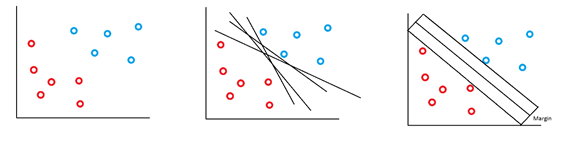

</center>

As known, the **svm algorithm** can classify the data which is either linearly separable or not and it depends on separating the classes (two or more) using different functions to get the relations between pairs of samples. There are three main functions called **kernel functions** (will be mentioned later). <br><br>
There are some terms you need to know before we dive in,<br><br> **First, Hyperplane**: this is the separating plane that we have to find to separate classes of data and there are tons of planes that can be found to separate the data but we have to find the optimal hyperplane as we will see later.
<br><br>**Second, Support Vectors**: to find the optimal hyperplane that separates the data, we should depend on the data samples to decide which one is optimal but should we depend on all the data? Actually no, there are specific data samples at the edges that can be thought of as supporters of all samples behind, so they are the most critical ones that help deciding the position of the best optimal hyperplane and these samples are called **support vectors**.<br><br>
These samples are the most difficult to classify because they are found at the edges so our approach will be to find the hyperplane that maximizes the distance between the two edges which is the **third term** you should know **the margin**.<br><br>

<center>

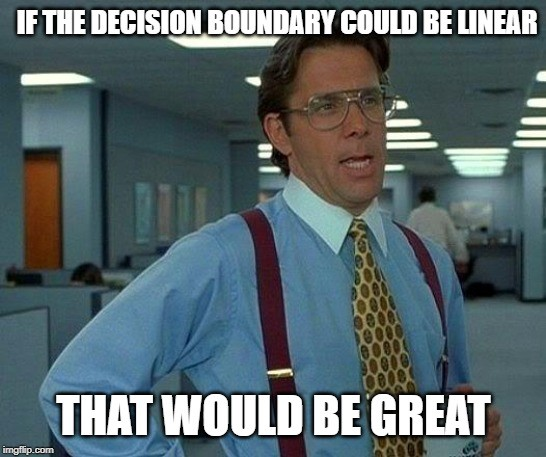

</center>

# **Don't worry about that!** <br>
The **kernel function** we mentioned, is used to separate the data which is not linearly separable so it's applied on the data to transform it to a higher dimension based on its type and **the trick** is that it does this and gets the relations between samples without actually transforming them and consume tiring computations.<br><br>

The following are linear and nonlinear kernel functions ...



```
x, y: samples
l: coefficient
d: degree
γ: gamma
```

<center>

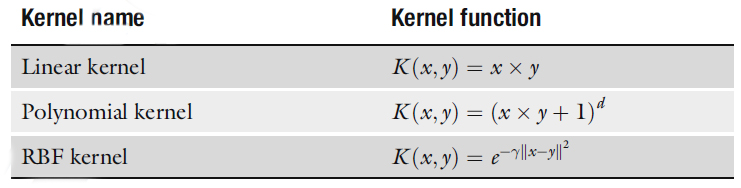
</center>

> # We will start by defining the kernel functions that will be used in our algorithm.

In [17]:
# kernel functions

def linear_kernel(**kwargs):
    def f(x1, x2):
        return np.inner(x1, x2)
    return f


def polynomial_kernel(power, coef, **kwargs):
    def f(x1, x2):
        return (np.inner(x1, x2) + coef)**power
    return f


def rbf_kernel(gamma, **kwargs):
    def f(x1, x2):
        distance = np.linalg.norm(x1 - x2) ** 2
        return np.exp(-gamma * distance)
    return f

> # We will create a class for our algorithm to be able to create an object for our model.

In [18]:
class SupportVectorMachine(object):
  def __init__(self, C=1, kernel=linear_kernel, power=4, gamma=None, coef=4):
          self.C = C
          self.kernel = kernel
          self.power = power
          self.gamma = gamma
          self.coef = coef
          self.lagr_multipliers = None
          self.support_vectors = None
          self.support_vector_labels = None
          self.intercept = None

I created many attributes for our algorithm which are related to the kernel functions in the algorithm. Some are initialized by default values, others not.
<br><br>


```
    C: float
        Penalty term.
    kernel: function
        Kernel function. Can be either polynomial, rbf or linear.
    power: int
        The degree of the polynomial kernel. Will be ignored by the other
        kernel functions.
    gamma: float
        Used in the rbf kernel function.
    coef: float
        Bias term used in the polynomial kernel function.
```



In [19]:
n_samples, n_features = np.shape(X)

In [20]:
n_samples, n_features

(700, 2)

In [21]:
# create model object
model = SupportVectorMachine()

In [22]:
model.kernel

<function __main__.linear_kernel>

We are using linear kernel function as initialized. If you want to change it to rbf kernel, you can do the following ...

```
model.kernel = rbf_kernel
```

So we will change our kernel.


In [23]:
model.kernel = rbf_kernel

In [24]:
# Set gamma to 1/n_features by default
if not model.gamma:
    model.gamma = 1 / (n_features * X.var())
 
# Initialize the parameters of kernel methods
model.kernel = model.kernel(
    power=model.power,
    gamma=model.gamma,
    coef=model.coef)

model.kernel

<function __main__.rbf_kernel.<locals>.f>

> # Now, We will explain the steps of how the algorithm fits and I'll start with creating the kernel matrix. <br>- Wait, what is this ?!

As we mentioned, we find relations between pairs of data samples based on the kernel type so, the **kernel matrix** represents pairwise
similarities for instances in the training set. It represents the information about the training set that is provided as input to the **optimization** process. It will looklike this ...<br><br> 
```
m: number of samples
```

<center>

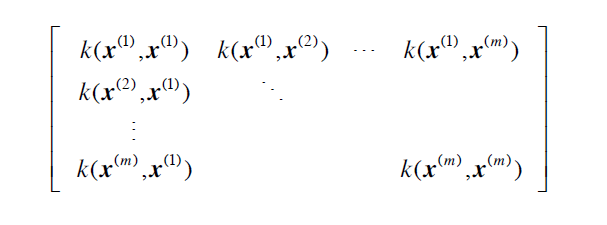

</center>

In [25]:
# Calculate kernel matrix
kernel_matrix = np.zeros((n_samples, n_samples))

print(kernel_matrix, end='\n\n')

print(kernel_matrix.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

(700, 700)


We will fill the matrix with actual values by applying the function of the kernel.

In [26]:
for i in range(n_samples):
  for j in range(n_samples):
    kernel_matrix[i, j] = model.kernel(X[i], X[j])


print(kernel_matrix)

[[1.         0.70430024 0.33901942 ... 0.92417963 0.24714834 0.60019621]
 [0.70430024 1.         0.09774769 ... 0.78716052 0.53781376 0.98339509]
 [0.33901942 0.09774769 1.         ... 0.17681209 0.00730421 0.0741397 ]
 ...
 [0.92417963 0.78716052 0.17681209 ... 1.         0.42820622 0.68272728]
 [0.24714834 0.53781376 0.00730421 ... 0.42820622 1.         0.54105204]
 [0.60019621 0.98339509 0.0741397  ... 0.68272728 0.54105204 1.        ]]


> # Three key points you should understand, that occurs in SVM



1.   Maximizing the margin / it doesn't choose any hyperplane.
2.   Penalizing misclassified samples / it allows some misclassification not to be sensitive to outliers which badly affects hyperplane position.
3.   Using optimization methods / it solves the constrained qudaratic function by lagrange multipliers.


```
x: feature
b: bias
w: weights
```

<center>


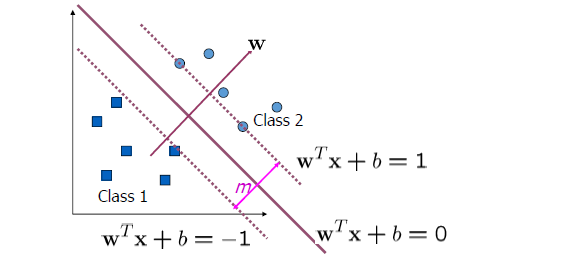

</center>

To recap, **Inputs** for the algorithm are features and labels and **output** is set of *weights*, one for each feature, whose linear combination predicts the label. So, It uses the optimization of maximizing
the margin (width) to **reduce the number of weights**
that are nonzero to just a few that correspond to the
important features that **matter** in deciding the separating
hyperplane ... these **nonzero weights** correspond to the
support vectors. (because they support the separating
hyperplane). **The weights represent this hyperplane, by giving you the coordinates of a vector which is orthogonal to the hyperplane, it's direction gives us the predicted class, so if you take the dot product of any point with the vector, you can tell on which side it is: if the dot product is positive, it belongs to the positive class, if it is negative it belongs to the negative class.**<br><br> Another output is the *bias term b*, it's a special parameter in SVM. Without it, the classifier will always go through the origin. So, SVM does not give you the separating hyperplane with the maximum margin if it does not happen to pass through the origin, unless you have a bias term.

<center>

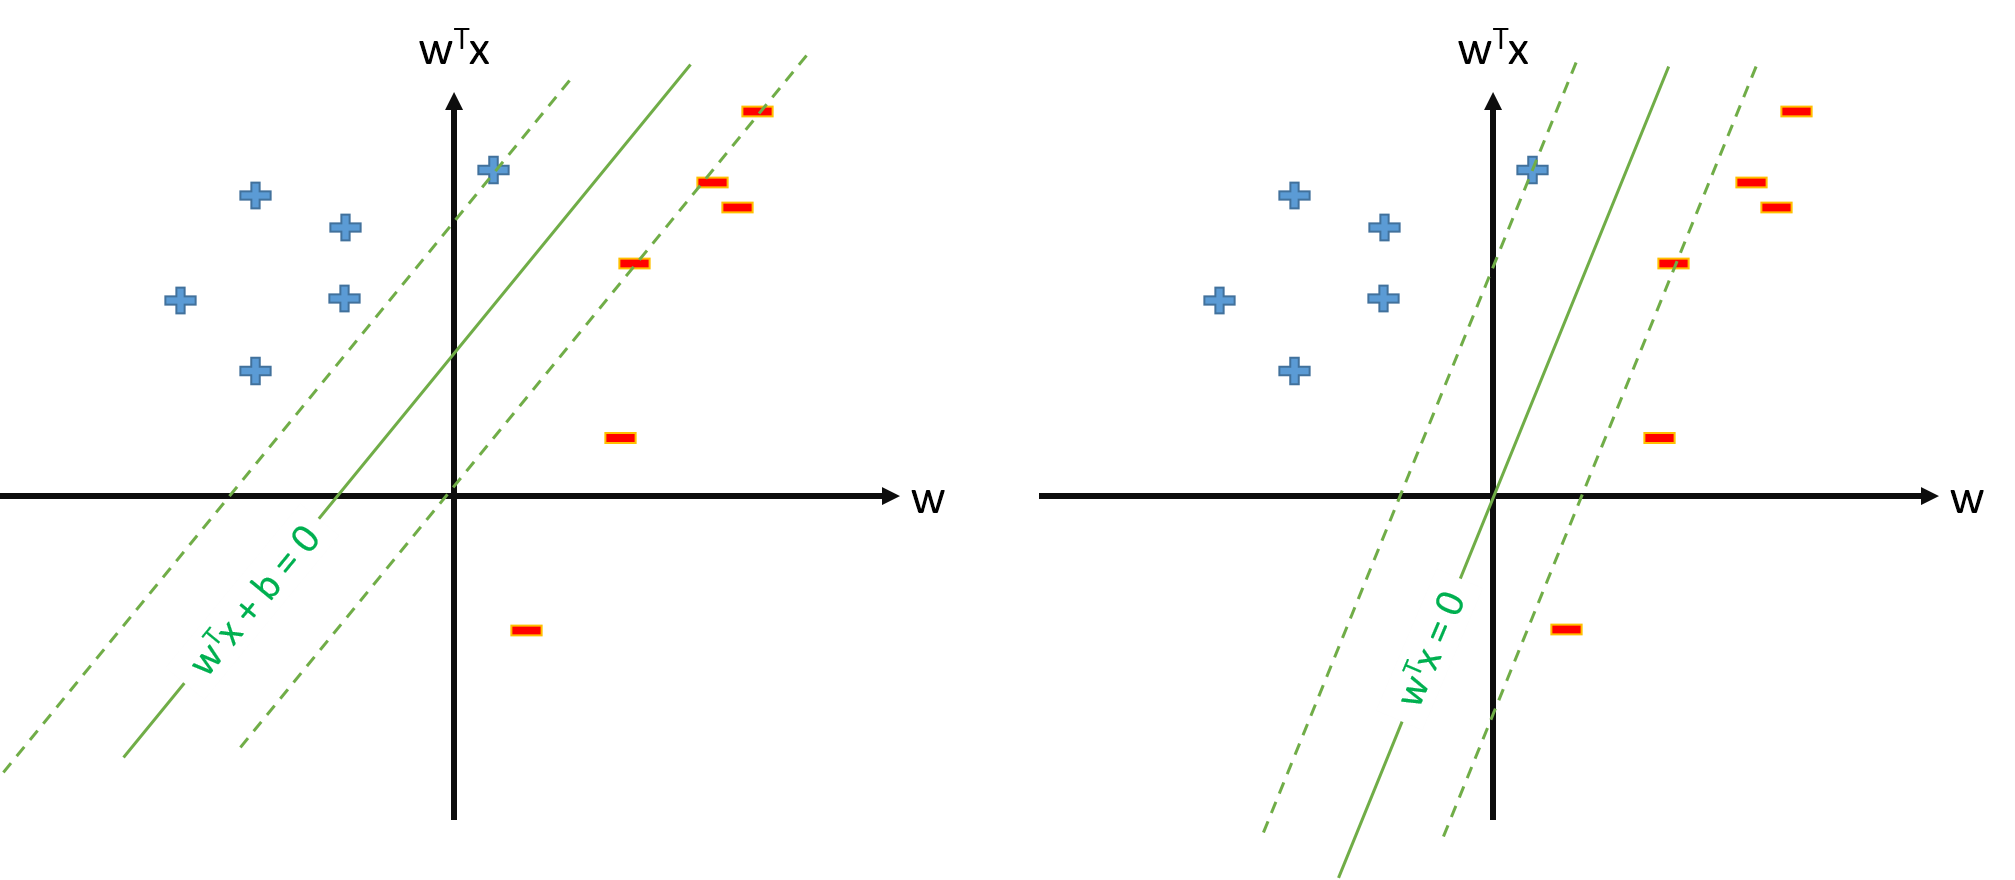

</center>



Now, to solve the optimization problem, the following are the quadratic function and constrains in our algorithm ...

<center>

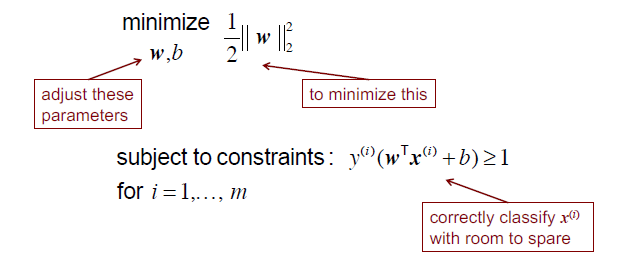

</center>

Essentially these two constraints basically require the training data to be correctly classified, and at least a certain distance from the decision threshold 0. The hyperplane that fulfils these constraints with the smallest norm of the weights will have the maximal margin. The value ±1 is essentially arbitrary, you could replace it with ± any value you like and it would merely rescale the coefficients of the hyper-plane, but without changing the decision boundary. A value of 1 is used just to keep the maths neat.

We will solve the optimization problem by **cvxopt** library that takes matrices based on the coefficients of the quadratic function and constrains when formulated in a specific form, then we get **lagrange multipliers**. Learn more from [here](https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf)

In [27]:
import cvxopt

# Define the quadratic optimization problem
P = cvxopt.matrix(np.outer(y, y) * kernel_matrix, tc='d')
q = cvxopt.matrix(np.ones(n_samples) * -1)
A = cvxopt.matrix(y, (1, n_samples), tc='d')
b = cvxopt.matrix(0, tc='d')

if not model.C:
    G = cvxopt.matrix(np.identity(n_samples) * -1)
    h = cvxopt.matrix(np.zeros(n_samples))
else:
    G_max = np.identity(n_samples) * -1
    G_min = np.identity(n_samples)
    G = cvxopt.matrix(np.vstack((G_max, G_min)))
    h_max = cvxopt.matrix(np.zeros(n_samples))
    h_min = cvxopt.matrix(np.ones(n_samples) * model.C)
    h = cvxopt.matrix(np.vstack((h_max, h_min)))

In [28]:
# Solve the quadratic optimization problem using cvxopt
minimization = cvxopt.solvers.qp(P, q, G, h, A, b)

# Lagrange multipliers
lagr_mult = np.ravel(minimization['x'])

     pcost       dcost       gap    pres   dres
 0: -4.0510e+01 -1.1590e+03  6e+03  2e+00  2e-15
 1: -2.4829e+01 -5.1661e+02  6e+02  9e-02  1e-15
 2: -2.4841e+01 -9.4356e+01  8e+01  1e-02  2e-15
 3: -3.0413e+01 -5.5824e+01  3e+01  3e-03  1e-15
 4: -3.2029e+01 -4.8758e+01  2e+01  1e-03  1e-15
 5: -3.3394e+01 -4.3554e+01  1e+01  5e-04  1e-15
 6: -3.4283e+01 -4.0456e+01  6e+00  2e-04  1e-15
 7: -3.5203e+01 -3.8248e+01  3e+00  2e-05  1e-15
 8: -3.5836e+01 -3.7281e+01  1e+00  1e-05  1e-15
 9: -3.6067e+01 -3.6873e+01  8e-01  3e-06  1e-15
10: -3.6211e+01 -3.6659e+01  4e-01  3e-16  1e-15
11: -3.6348e+01 -3.6495e+01  1e-01  2e-16  1e-15
12: -3.6414e+01 -3.6422e+01  8e-03  2e-15  1e-15
13: -3.6417e+01 -3.6418e+01  1e-04  2e-15  1e-15
14: -3.6417e+01 -3.6417e+01  1e-06  1e-15  1e-15
Optimal solution found.


In [29]:
print(lagr_mult, end='\n\n')
print(lagr_mult.shape)

[7.65118105e-08 5.78356093e-10 1.26995485e-09 1.02608269e-09
 6.05412787e-10 1.20423810e-09 7.65940130e-10 9.99999999e-01
 2.83350230e-09 1.00558909e-09 6.16241400e-10 8.48109029e-10
 6.08429058e-10 5.58754323e-10 7.95884471e-10 9.99999998e-01
 1.00000000e+00 6.93327970e-10 7.36609868e-10 1.71050331e-09
 6.49669920e-10 6.95988550e-10 1.77038158e-09 6.94353863e-10
 8.34077230e-10 2.64512878e-09 7.09777234e-10 2.04537420e-09
 1.67506527e-09 1.24931416e-09 6.26729406e-10 1.08506444e-09
 6.67829184e-10 1.10652327e-09 9.43541176e-10 5.80771935e-10
 3.38090522e-09 9.99999999e-01 6.37497034e-10 8.54699728e-10
 1.33598754e-09 1.05883726e-09 6.43262405e-10 1.14788752e-09
 1.30149938e-09 5.16303288e-01 8.74261373e-10 1.27998240e-09
 6.39083169e-10 8.18237850e-10 1.46108956e-09 1.20779693e-09
 9.99999998e-01 9.34562138e-10 7.02034720e-10 6.61167385e-10
 5.96225317e-10 6.24197020e-10 6.54908441e-10 7.50319677e-10
 1.10643287e-09 7.07195693e-10 9.99999997e-01 1.02529834e-09
 1.51142862e-09 1.057447

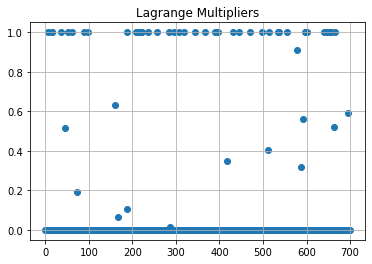

In [30]:
_ = plt.scatter(range(len(lagr_mult)), lagr_mult)
plt.title("Lagrange Multipliers")
plt.grid()

As shown, there are **nonzero** points that matter in the hyperplane position.

> # Let's try different threshold values for lagrange

In [31]:
sorted(lagr_mult)[-100:]

[2.0380769915964665e-09,
 2.0394201006579535e-09,
 2.044789063043441e-09,
 2.0453742013777115e-09,
 2.0460720000505097e-09,
 2.0869156055247367e-09,
 2.10501514856169e-09,
 2.160545835470637e-09,
 2.1832946077169235e-09,
 2.1983985900830013e-09,
 2.3861027032472632e-09,
 2.4446122101723704e-09,
 2.4544382849945594e-09,
 2.4836690859060042e-09,
 2.606072054069274e-09,
 2.645128782624482e-09,
 2.8335023009007154e-09,
 2.8424956861381238e-09,
 2.8533302725753907e-09,
 2.951016848146835e-09,
 3.017768080625698e-09,
 3.162922051187239e-09,
 3.332245555634512e-09,
 3.3659260400883014e-09,
 3.3809052217770183e-09,
 3.4025139303867384e-09,
 3.5349995206603166e-09,
 3.751746457549484e-09,
 4.1276348184465446e-09,
 4.139094456018233e-09,
 4.217129177356838e-09,
 4.308846417572145e-09,
 4.356460968997948e-09,
 4.959854198203276e-09,
 5.685501518185719e-09,
 5.846563395569705e-09,
 5.890918764093791e-09,
 5.901280091485152e-09,
 6.549103758812257e-09,
 6.678576036960788e-09,
 6.775225900925028e-09

In [32]:
# checking threshold values to decide number of points
print(np.sum(lagr_mult > 1e-07)) # sometimes taken as default or 1e-10
print(np.sum(lagr_mult > 1e-9))
print(np.sum(lagr_mult > 1e-10))

52
238
700


In [33]:
y[lagr_mult > 1e-07]

array([ 1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
        1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,
        1])

In [34]:
threshold1 = 1e-07
threshold2 = 0.001
threshold3 = 1e-10

thresholds = [threshold1, threshold2, threshold3]

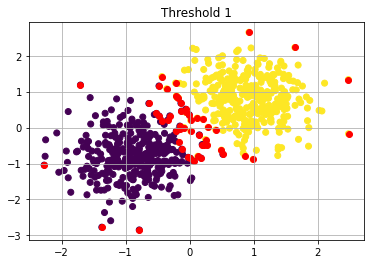

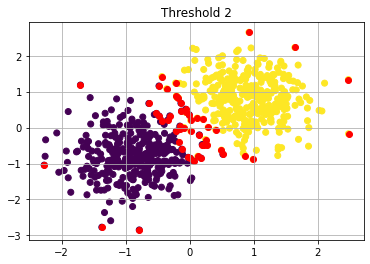

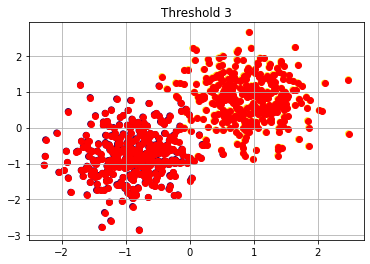

In [35]:
for ind, threshold in enumerate(thresholds):

    # Extract support vectors
    idx = lagr_mult > threshold
    model.lagr_multipliers = lagr_mult[idx]
    model.support_vectors = X[idx]
    model.support_vector_labels = y[idx]

    # visualize support vectors
    #plt.subplot(2, 2, ind+1)
    _ = plt.scatter(X[:,0], X[:,1], c=y)
    _ = plt.scatter(model.support_vectors[:,0], model.support_vectors[:,1], c='red')
    _ = plt.title(f"Threshold {ind+1}")
    _ = plt.grid()
    plt.show()

**Threshold 1** looks convenient for the points in lagrange plot.

In [36]:
# Extract support vectors
# Get indexes of non-zero lagr. multipiers
idx = lagr_mult > threshold1

# Get the corresponding lagr. multipliers
model.lagr_multipliers = lagr_mult[idx]

# Get the samples that will act as support vectors
model.support_vectors = X[idx]

# Get the corresponding labels
model.support_vector_labels = y[idx]

print(model.support_vectors.shape)

(52, 2)


We will initialize the intercept from the equation below according to the first support vector.<br><br>

<center>

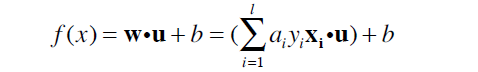

</center>

In [37]:
# Calculate intercept with first support vector
model.intercept = model.support_vector_labels[0]
for i in range(len(model.lagr_multipliers)):
    model.intercept -= model.lagr_multipliers[i] * model.support_vector_labels[i] * model.kernel(model.support_vectors[i], model.support_vectors[0])

print(model.intercept)

1.3458648502532844


> # **Now, we will test the algorithm (predict) on test data**

We will use the **same equation** above in **prediction**.

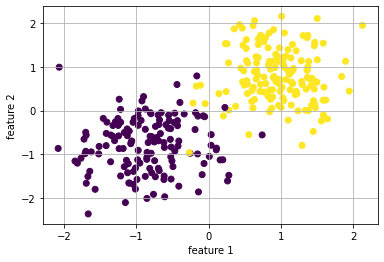

In [38]:
# test data

X_test = scaler.transform(X_test)

_ = plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
_ = plt.xlabel('feature 1')
_ = plt.ylabel('feature 2')
_ = plt.grid()

# Predicting train and test data and calculating accuracy

In [39]:
data = [(X, y), (X_test, y_test)]
preds = []
g = 0
for set_ in data:
    g += 1
    y_pred = []
    # Iterate through list of samples and make predictions
    for sample in set_[0]:
        prediction = 0
        # Determine the label of the sample by the support vectors
        for i in range(len(model.lagr_multipliers)):
            prediction += model.lagr_multipliers[i] * model.support_vector_labels[i] * model.kernel(model.support_vectors[i], sample)
        prediction += model.intercept
        y_pred.append(np.sign(prediction))

    y_pred = np.array(y_pred)
    preds.append(y_pred)
    accuracy_ = (np.sum(y_pred == set_[1])/len(y_pred)*100).round(2)
    print(f'Accuracy in {"train" if g == 1 else "test"} set: {accuracy_} %')

Accuracy in train set: 92.14 %
Accuracy in test set: 89.0 %


## You can check results with cross validation

Apply this code to make folds of your data and then make the algorithm fit the train data and check the accuracy of test data and then append it to the list and after finishing all folds, you will get many scores with number of folds, so you can get the mean of them and this becomes your suggested accuracy which you can check your model with.

> ## I'll group the steps above in two fit and predict functions.

In [40]:
def fit_data(X, y):

    n_samples, n_features = np.shape(X)
    model.gamma = 1 / (n_features * X.var())
    kernel_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
      for j in range(n_samples):
        kernel_matrix[i, j] = model.kernel(X[i], X[j])

    cvxopt.solvers.options['show_progress'] = False
    P = cvxopt.matrix(np.outer(y, y) * kernel_matrix, tc='d')
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples), tc='d')
    b = cvxopt.matrix(0, tc='d')
    G_max = np.identity(n_samples) * -1
    G_min = np.identity(n_samples)
    G = cvxopt.matrix(np.vstack((G_max, G_min)))
    h_max = cvxopt.matrix(np.zeros(n_samples))
    h_min = cvxopt.matrix(np.ones(n_samples) * model.C)
    h = cvxopt.matrix(np.vstack((h_max, h_min)))
    minimization = cvxopt.solvers.qp(P, q, G, h, A, b)
    lagr_mult = np.ravel(minimization['x'])
    idx = lagr_mult > 1e-07
    model.lagr_multipliers = lagr_mult[idx]
    model.support_vectors = X[idx]
    model.support_vector_labels = y[idx]

    model.intercept = model.support_vector_labels[0]
    for i in range(len(model.lagr_multipliers)):
        model.intercept -= model.lagr_multipliers[i] * model.support_vector_labels[i] * model.kernel(model.support_vectors[i], model.support_vectors[0])

def predict_data(X):

    y_pred = []
    # Iterate through list of samples and make predictions
    for sample in X:
        prediction = 0
        # Determine the label of the sample by the support vectors
        for i in range(len(model.lagr_multipliers)):
            prediction += model.lagr_multipliers[i] * model.support_vector_labels[i] * model.kernel(model.support_vectors[i], sample)
        prediction += model.intercept
        y_pred.append(np.sign(prediction))
    return np.array(y_pred)

In [41]:
X_total = scaler.fit_transform(X_total, y_total)

scores_list = []
kf = KFold(n_splits=5, shuffle=False).split(range(n_samples))
for i, j in kf:
  fit_data(X_total[i], y_total[i]) # train
  y_total_pred = predict_data(X_total[j]) # test
  score = np.sum(y_total_pred == y_total[j])/len(y_total_pred)
  scores_list.append(score)

print(f"Mean Accuracy: {np.mean(scores_list).round(3)}")

Mean Accuracy: 0.959


> # **Classification metrics**

By evaluating the model, we can measure the quality of our model and can see how well can it do with respect to many cases tested by different metrics. So, we will cover them now ... Our metrics depend on these **four values** and these values form what is called **confusion matrix**

<center>

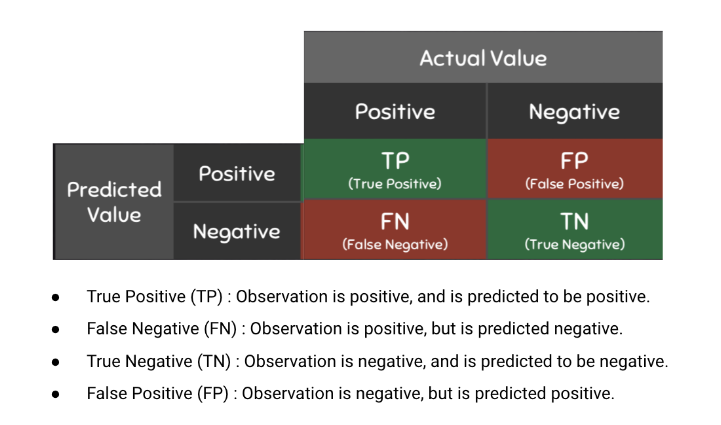

</center>

After calculating these values, our **metrics** come. We will calculate all of them now ...

<center>

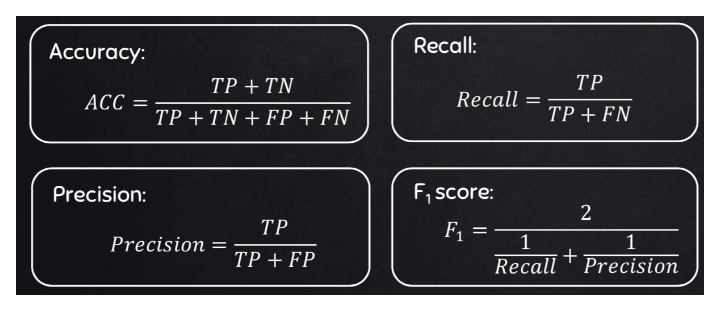

</center>

In [42]:
# assigning actual and predictive values in df for train and test
y_pred_train, y_pred_test = preds

train_labels = pd.DataFrame(np.c_[y, y_pred_train], columns=["y_train", "y_pred_train"])
test_labels = pd.DataFrame(np.c_[y_test, y_pred_test], columns=["y_test", "y_pred_test"])

In [43]:
def print_metrics(data_frame):

    TP = np.sum((data_frame.iloc[:,0] == 1) & (data_frame.iloc[:,1] == 1))
    TN = np.sum((data_frame.iloc[:,0] == -1) & (data_frame.iloc[:,1] == -1))
    FN = np.sum((data_frame.iloc[:,0] == 1) & (data_frame.iloc[:,1] == -1))
    FP = np.sum((data_frame.iloc[:,0] == -1) & (data_frame.iloc[:,1] == 1))

    accuracy = (TP + TN) / (TP + TN + FN + FP)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = (2 * precision * recall) / (precision + recall)

    print(f"Accuracy: {accuracy.round(3)}")
    print(f"Precision: {precision.round(3)}")
    print(f"Recall: {recall.round(3)}")
    print(f"F1 score: {f1_score.round(3)}")

    print(f"Confusion Matrix: \n\t\t[{(TN, FP)}]\n\t\t[{(FN, TP)}]")

In [44]:
print_metrics(train_labels)

Accuracy: 0.921
Precision: 0.863
Recall: 1.0
F1 score: 0.926
Confusion Matrix: 
		[(299, 55)]
		[(0, 346)]


In [45]:
print_metrics(test_labels)

Accuracy: 0.89
Precision: 0.827
Recall: 0.994
F1 score: 0.903
Confusion Matrix: 
		[(114, 32)]
		[(1, 153)]


> # Comparing results with **sklearn**

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

svc_model = SVC(kernel='rbf', gamma='scale')
svc_model.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
svc_model.support_vectors_.shape

(52, 2)

In [48]:
pred_y = svc_model.predict(X)
pred_y_test = svc_model.predict(X_test)

print("Accuracy [train set]:", accuracy_score(y, pred_y).round(3))
print("Accuracy [test set]:", accuracy_score(y_test, pred_y_test).round(3))
print()
print("Precision [train set]:", precision_score(y, pred_y).round(3))
print("Precision [test set]:", precision_score(y_test, pred_y_test).round(3))
print()
print("Recall [train set]:", recall_score(y, pred_y).round(3))
print("Recall [test set]:", recall_score(y_test, pred_y_test).round(3))
print()
print("F1 Score [train set]:", f1_score(y, pred_y).round(3))
print("F1 Score [test set]:", f1_score(y_test, pred_y_test).round(3))

Accuracy [train set]: 0.983
Accuracy [test set]: 0.98

Precision [train set]: 0.98
Precision [test set]: 0.981

Recall [train set]: 0.986
Recall [test set]: 0.981

F1 Score [train set]: 0.983
F1 Score [test set]: 0.981


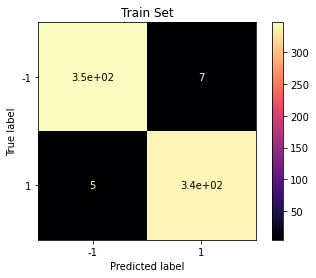

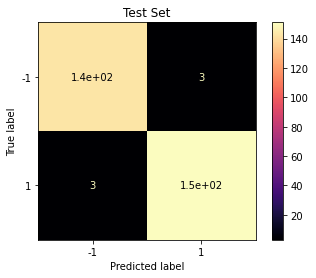

In [49]:
_ = plot_confusion_matrix(svc_model, X, y, cmap='magma')
_ = plt.title("Train Set")
print()
_ = plot_confusion_matrix(svc_model, X_test, y_test, cmap='magma')
_ = plt.title("Test Set")

## You can check reults with cross validation

In [50]:
print("Mean Accuracy:", cross_val_score(svc_model, X_total, y_total, scoring='accuracy', cv=5).mean())

Mean Accuracy: 0.982


> # **This is the final implementation of SVM algorithm**



```
# libraries
import numpy as np
import cvxopt

# Hide cvxopt output
cvxopt.solvers.options['show_progress'] = False

# kernel functions
def linear_kernel(**kwargs):
    def f(x1, x2):
        return np.inner(x1, x2)
    return f

def polynomial_kernel(power, coef, **kwargs):
    def f(x1, x2):
        return (np.inner(x1, x2) + coef)**power
    return f

def rbf_kernel(gamma, **kwargs):
    def f(x1, x2):
        distance = np.linalg.norm(x1 - x2) ** 2
        return np.exp(-gamma * distance)
    return f

# the algorithm
class SupportVectorMachine(object):
    """The Support Vector Machine classifier.
    Uses cvxopt to solve the quadratic optimization problem.
    Parameters:
    -----------
    C: float
        Penalty term.
    kernel: function
        Kernel function. Can be either polynomial, rbf or linear.
    degree: int
        The degree of the polynomial kernel. Will be ignored by the other
        kernel functions.
    gamma: float
        Used in the rbf kernel function.
    coef: float
        Bias term used in the polynomial kernel function.
    """
    def __init__(self, C=1, kernel='linear', degree=4, gamma=None, coef=4):
        if kernel == 'linear':
          self.kernel = linear_kernel
        elif kernel == 'poly':
          self.kernel = polynomial_kernel
        elif kernel == 'rbf':
          self.kernel = rbf_kernel

        self.C = C
        self.degree = degree
        self.gamma = gamma
        self.coef = coef
        self.lagr_multipliers = None
        self.support_vectors = None
        self.support_vector_labels = None
        self.intercept = None

    def fit(self, X, y):

        n_samples, n_features = np.shape(X)

        # Set gamma to 1/n_features by default
        if not self.gamma:
            self.gamma = 1 / n_features

        # Initialize kernel method with parameters
        self.kernel = self.kernel(
            degree=self.degree,
            gamma=self.gamma,
            coef=self.coef)

        # Calculate kernel matrix
        kernel_matrix = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                kernel_matrix[i, j] = self.kernel(X[i], X[j])

        # Define the quadratic optimization problem
        P = cvxopt.matrix(np.outer(y, y) * kernel_matrix, tc='d')
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1, n_samples), tc='d')
        b = cvxopt.matrix(0, tc='d')

        if not self.C:
            G = cvxopt.matrix(np.identity(n_samples) * -1)
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            G_max = np.identity(n_samples) * -1
            G_min = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((G_max, G_min)))
            h_max = cvxopt.matrix(np.zeros(n_samples))
            h_min = cvxopt.matrix(np.ones(n_samples) * self.C)
            h = cvxopt.matrix(np.vstack((h_max, h_min)))

        # Solve the quadratic optimization problem using cvxopt
        minimization = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        lagr_mult = np.ravel(minimization['x'])

        # Extract support vectors
        # Get indexes of non-zero lagr. multipiers
        idx = lagr_mult > 1e-7 # you can force input here to choose threshold
        # Get the corresponding lagr. multipliers
        self.lagr_multipliers = lagr_mult[idx]
        # Get the samples that will act as support vectors
        self.support_vectors = X[idx]
        # Get the corresponding labels
        self.support_vector_labels = y[idx]

        # Calculate intercept with first support vector
        self.intercept = self.support_vector_labels[0]
        for i in range(len(self.lagr_multipliers)):
            self.intercept -= self.lagr_multipliers[i] * self.support_vector_labels[i] * self.kernel(self.support_vectors[i], self.support_vectors[0])

    def predict(self, X):
        y_pred = []
        # Iterate through list of samples and make predictions
        for sample in X:
            prediction = 0
            # Determine the label of the sample by the support vectors
            for i in range(len(self.lagr_multipliers)):
                prediction += self.lagr_multipliers[i] * self.support_vector_labels[i] * self.kernel(self.support_vectors[i], sample)
            prediction += self.intercept
            y_pred.append(np.sign(prediction))
        return np.array(y_pred)
```



# One last thing you should take into consideration, **Overfitting** ...

<center>

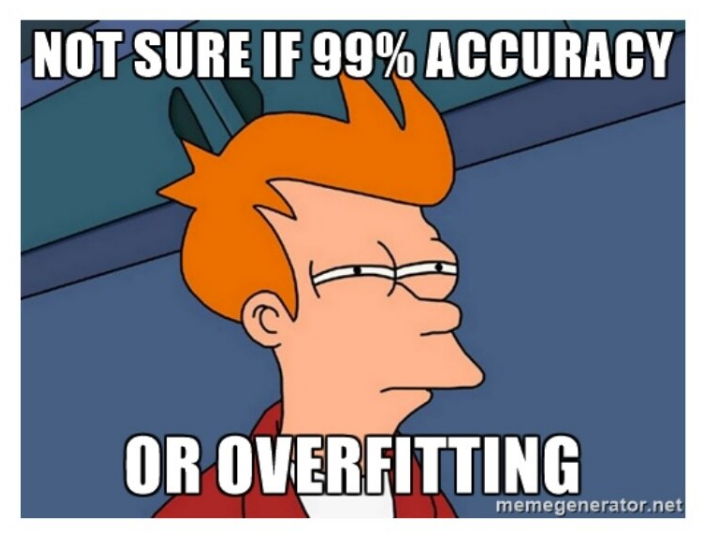

</center>

### When we fit a model to data we always have to be careful not to overfit. If we **overfit** the model this means that the model learned specific aspects of the training data and **does not generalise** to new, unseen data. Instead of learning useful relations between the input feature and the target, the model has memorised the training samples. If this happens *`the model will perform very poorly`* on new data and therefore we want to make sure this does not happen.




> # **Now, I'll create a new model and attempt to make the model overfit**

## Try different values for hyperparameters

In [51]:
# trying different values for C and gamma
train_acc_list = []
test_acc_list = []
c_list, gamma_list = [], []

for c_val in [1, 5, 10, 12, 15, 50, 60, 100, 200, 500, 1000]:
  for gamma_val in [0.1, 0.25, 0.5, 0.75, 0.9, 1, 10, 20, 30, 50, 100]:

      new_SVC_model = SVC(kernel='rbf', gamma=gamma_val, C=c_val, random_state=40)
      new_SVC_model.fit(X, y)

      c_list.append(c_val)
      gamma_list.append(gamma_val)

      train_acc_list.append(accuracy_score(y, new_SVC_model.predict(X)))
      test_acc_list.append(accuracy_score(y_test, new_SVC_model.predict(X_test)))

## Inspecting results

In [52]:
results = pd.DataFrame(np.c_[c_list, gamma_list, train_acc_list, test_acc_list], columns=['C', 'Gamma', 'Train Accuracy', 'Test Accuracy'])

In [53]:
%load_ext google.colab.data_table
results

,C,Gamma,Train Accuracy,Test Accuracy
0,1.0,0.10,0.981429,0.980000
1,1.0,0.25,0.981429,0.980000
2,1.0,0.50,0.982857,0.980000
3,1.0,0.75,0.981429,0.983333
4,1.0,0.90,0.981429,0.983333
...,...,...,...,...
116,1000.0,10.00,0.998571,0.970000
117,1000.0,20.00,0.998571,0.953333
118,1000.0,30.00,1.000000,0.946667
119,1000.0,50.00,1.000000,0.950000


> ### This can indicate hyperparameter tuning

In [54]:
# inspecting accuracies with less than 3% difference
results[(results['Train Accuracy'] - results['Test Accuracy']) < 0.03] # indicates hyperparamerter tuning

,C,Gamma,Train Accuracy,Test Accuracy
0,1.0,0.10,0.981429,0.980000
1,1.0,0.25,0.981429,0.980000
2,1.0,0.50,0.982857,0.980000
3,1.0,0.75,0.981429,0.983333
4,1.0,0.90,0.981429,0.983333
...,...,...,...,...
112,1000.0,0.50,0.985714,0.973333
113,1000.0,0.75,0.990000,0.973333
114,1000.0,0.90,0.988571,0.973333
115,1000.0,1.00,0.990000,0.973333


> ### Searching for overfitting

In [55]:
# inspecting accuracies with more than 5% difference
results[(results['Train Accuracy'] - results['Test Accuracy']) > 0.05] # represents overfitting

,C,Gamma,Train Accuracy,Test Accuracy
87,100.0,100.0,1.0,0.950000
98,200.0,100.0,1.0,0.950000
108,500.0,50.0,1.0,0.950000
109,500.0,100.0,1.0,0.950000
118,1000.0,30.0,1.0,0.946667
119,1000.0,50.0,1.0,0.950000
120,1000.0,100.0,1.0,0.950000


### At this table, we can see the effect of **the hyperparameter 𝐶**, It controls the trade off between smooth decision boundary and classifying training points correctly. A large value of C means you will get more training points correctly. Also, we can see the effect of **the hyperparameter 𝛾**, lower values result in separations that look more linear and, as 𝛾 increases, it results in more complex separations.
### With a sufficiently high 𝛾, every observation of the training set are Support Vectors. In other words, every training point is used to define the hyperplane, which indicates a clear **overfitting**. You can prevent overfitting by various methods. Learn more from [here](https://elitedatascience.com/overfitting-in-machine-learning)

> # **Conclusion**

### - In this tutorial,

* we talked about the support vector machines and implemented the algorithm from scratch and inspected the process step by step.
* We compared results with sklearn library.
* We mentioned the evaluation metrics used in classification and talked about the issue of overfitting and how to deal with it.



#### - In general, SVM is a conceptually elegant machine, it's an effective and general method for representing complex functions in high dimensional space. It's not hard but there is just high dependence on mathematics, so, I highly recommend to give these resources a look, it helped me a lot in preparing this tutorial:
* [Implementation of code](https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/support_vector_machine.py)
* [SVM lecture from MIT](https://web.mit.edu/6.034/wwwbob/svm.pdf)
* [Another pdf lecture](https://www.biostat.wisc.edu/~craven/cs760/lectures/SVMs.pdf)
* [Many issues in SVM](http://svms.org/tutorials/slide1.pdf)
* [Kernel functions](https://scikit-learn.org/stable/modules/svm.html#kernel-functions)
* [Parameters tuning](https://towardsdatascience.com/visualizing-the-effect-of-hyperparameters-on-support-vector-machines-b9eef6f7357b)
* [Overfitting and solutions to](https://elitedatascience.com/overfitting-in-machine-learning)
* [How cvxopt library works](https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf)
* [SVM, three videos by Statquest](https://www.youtube.com/watch?v=efR1C6CvhmE)
* [SVM lecture by MIT OpenCourseWare](https://www.youtube.com/watch?v=_PwhiWxHK8o)
* [Constrained optimization by khan academy](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/constrained-optimization/a/lagrange-multipliers-single-constraint)

### Finally, I hope this tutorial helped in understanding SVMs, Thanks!

---